# Проект SQL

[yandex_practicum](https://practicum.yandex.ru/trainer/data-scientist/lesson/2d129b26-1195-4401-bae9-9a9e291701df/)

## Описание Базы данных

БД хранит информацию о венчурных фондах и инвестициях в компании-стартапы. Эта база данных основана на датасете Startup Investments, опубликованном на популярной платформе для соревнований по исследованию данных Kaggle. 

Анализировать рынок инвестиций без подготовки может быть непросто. Поэтому сначала познакомьтесь с важными понятиями, которые вам встретятся в работе с базой данных. 

Венчурные фонды — это финансовые организации, которые могут позволить себе высокий риск и инвестировать в компании с инновационной бизнес-идеей или разработанной новой технологией, то есть в стартапы. Цель венчурных фондов — в будущем получить значительную прибыль, которая в разы превысит размер их трат на инвестиции в компанию. Если стартап подорожает, венчурный фонд может получить долю в компании или фиксированный процент от её выручки. 

Чтобы процесс финансирования стал менее рискованным, его делят на стадии — раунды. Тот или иной раунд зависит от того, какого уровня развития достигла компания. 

- Первые этапы — предпосевной и посевной раунды. Предпосевной раунд предполагает, что компания как таковая ещё не создана и находится в стадии замысла. 
- Следующий — посевной — раунд знаменует рост проекта: создатели компании разрабатывают бизнес-модель и привлекают инвесторов. 

- Если компании требуется ментор или наставник — она привлекает бизнес-ангела. Бизнес-ангелы — инвесторы, которые помимо финансовой поддержки предлагают экспертную помощь. Такой раунд называют ангельским. 
- Когда стартап становится компанией с проверенной бизнес-моделью и начинает зарабатывать самостоятельно, предложений инвесторов становится больше. Это раунд A, а за ним следуют и другие: B, C, D — на этих этапах компания активно развивается и готовится к IPO. 
- Иногда выделяют венчурный раунд — финансирование, которое могло поступить от венчурного фонда на любом этапе: начальном или более позднем

## Структура Базы данных

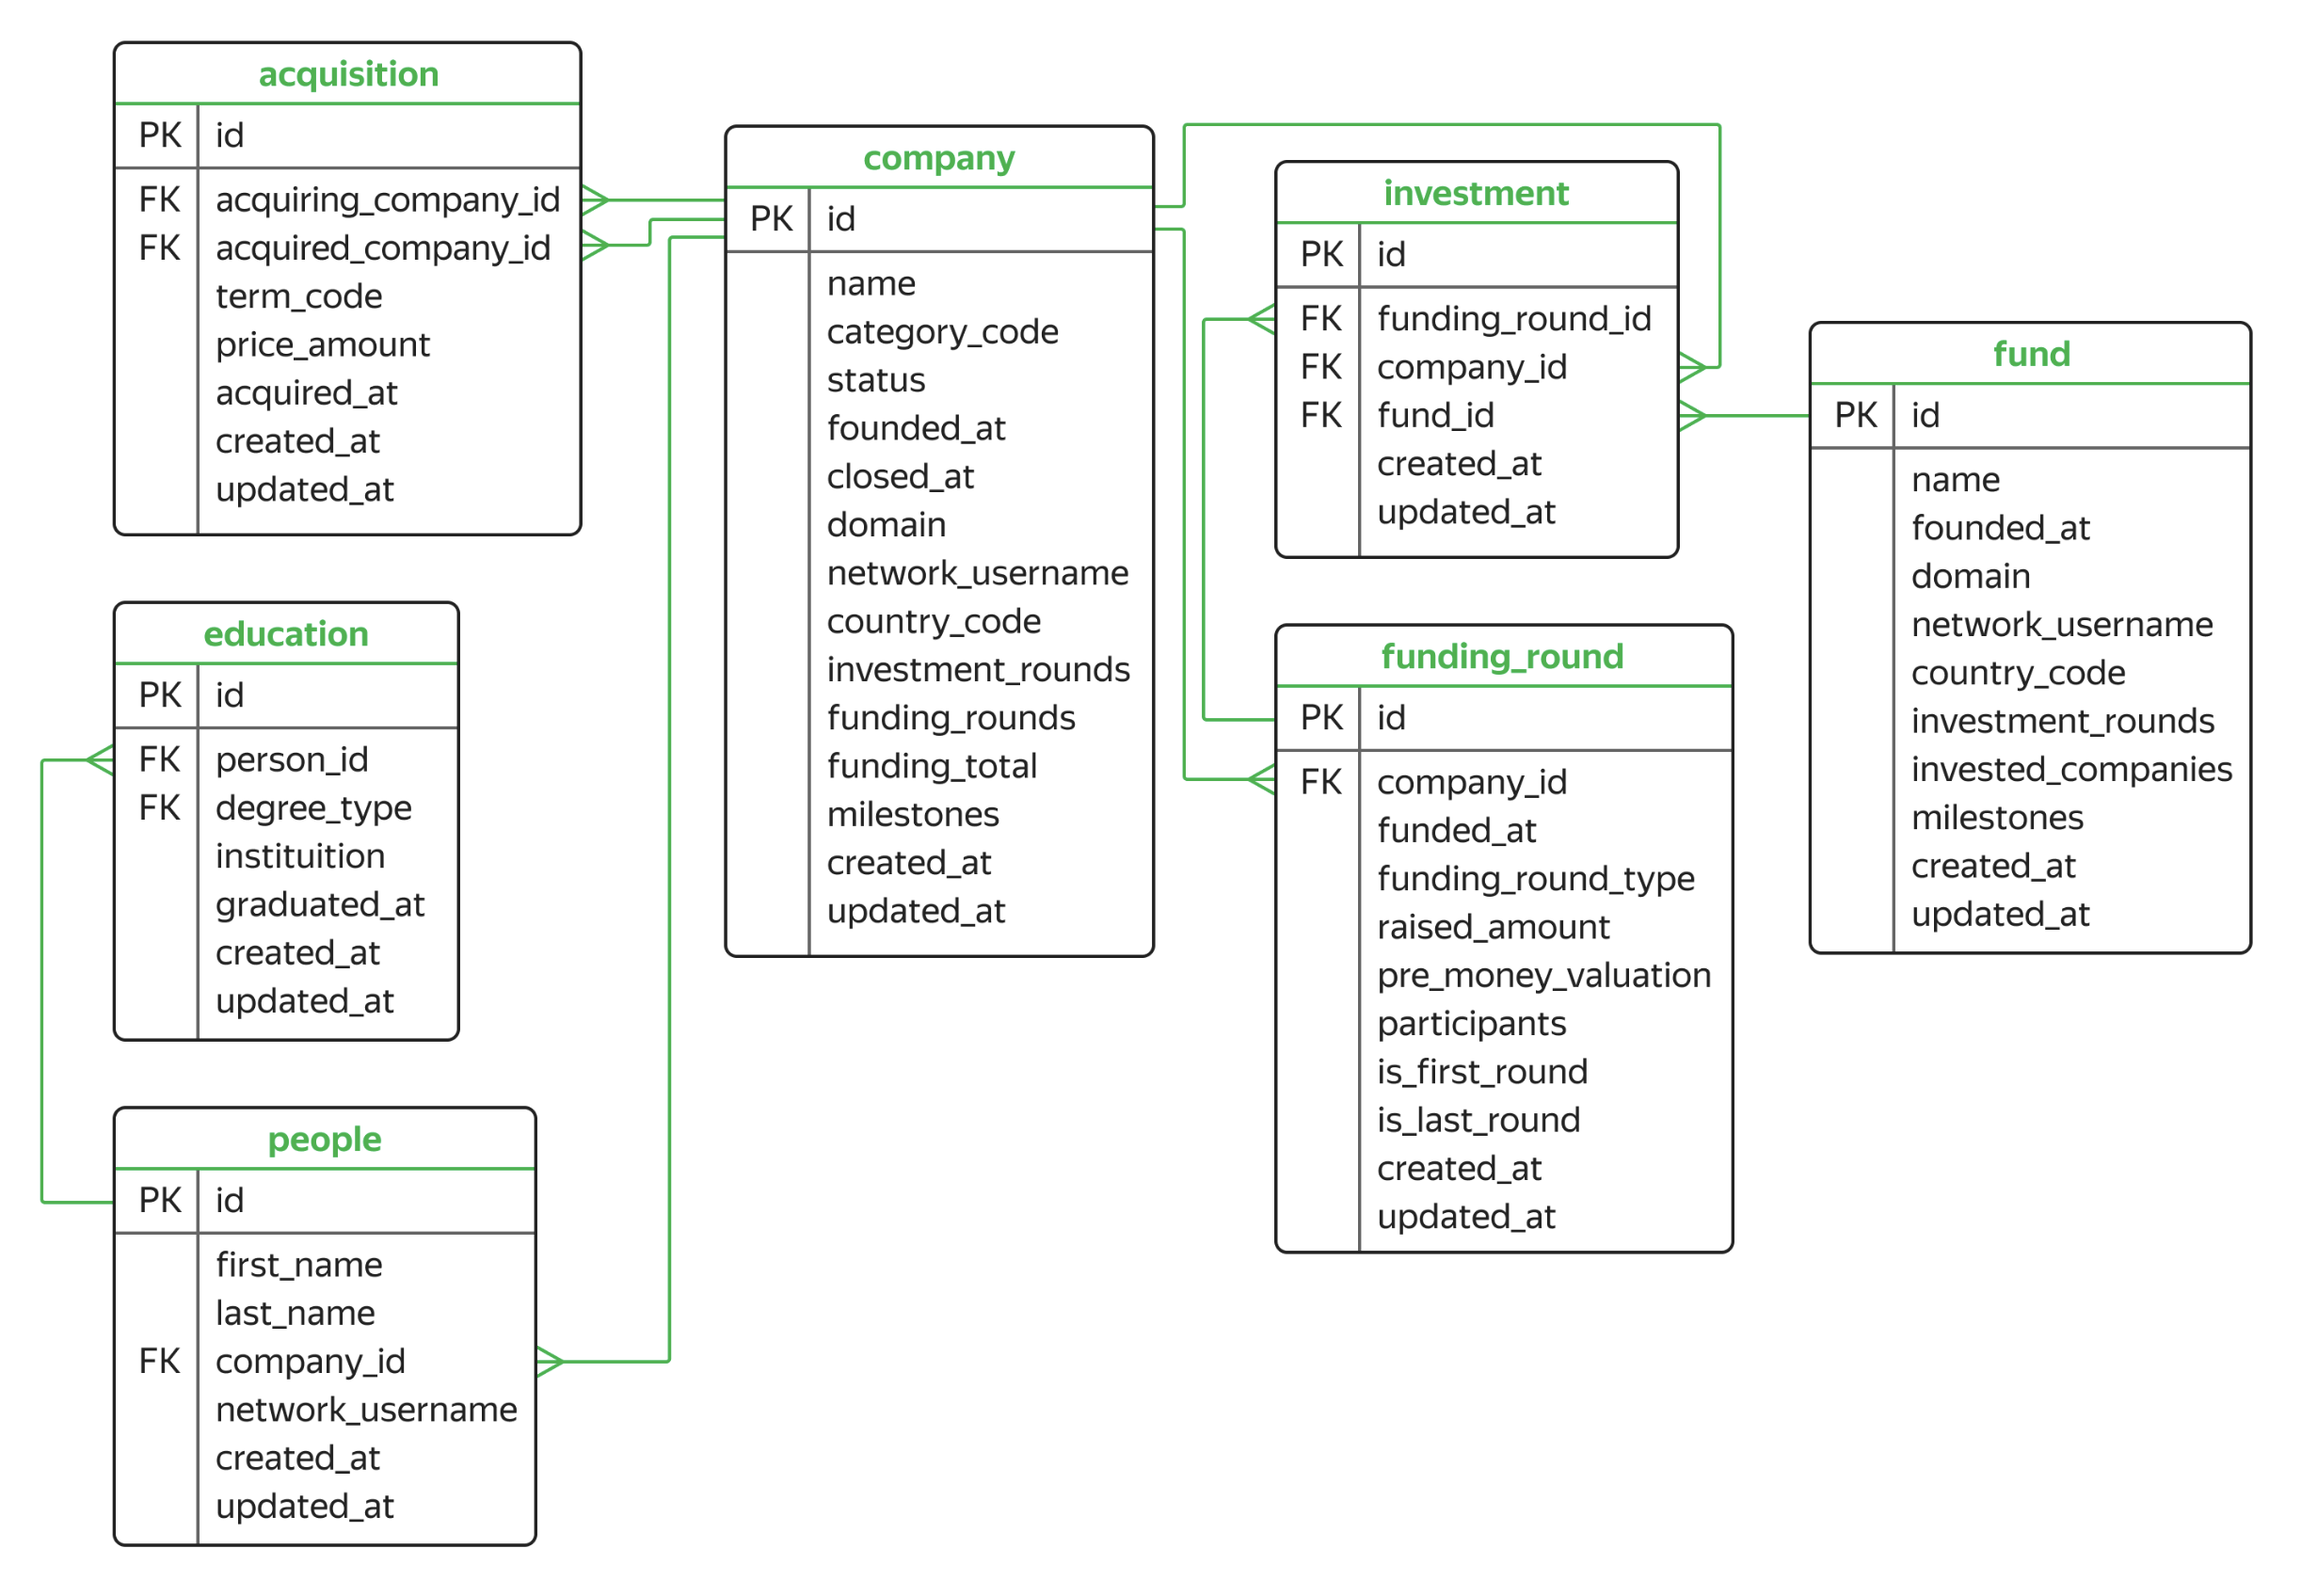

In [1]:
# функция выбора цвета для текста output 

from IPython.display import Markdown, display

def print_red(text):
    display(Markdown(f'<span style="color:red">{text}</span>'))

In [2]:
list_of_data = ['acquisitions.csv.zip', 
                'degrees.csv.zip',
                'funding_rounds.csv.zip',
                'funds.csv',
                'investments.csv.zip', 
                'ipos.csv',
                'milestones.csv.zip',
                'objects.csv.zip',
                'offices.csv.zip',
                'people.csv.zip',
                'relationships.csv.zip']

In [4]:
from zipfile import ZipFile
import pandas as pd

Читаем файлы: 
- если файл архива, сначала лезем в него, потом считываем его в одноименную переменную
- если файл csv - сразу считываем в одноименную переменную

In [5]:
trace = '/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/11_SQL/data/'   # путь до файла

for some_file in list_of_data:
    var_name = f'{some_file.split(".csv")[0]}_df'   # задаем имя будущей переменной для датафрейма

    # условие на архивный файл
    if some_file.endswith('.zip'):
        with ZipFile(f'{trace+some_file}', 'r') as zip_file:
            globals()[var_name] =  pd.read_csv(zip_file.open(f'{some_file.replace(".zip","")}'))

    # если файл не архивный
    elif some_file.endswith('.csv'):
        globals()[var_name] =  pd.read_csv(f'{trace+ some_file}')

    print_red(f'Таблица {var_name} размером {globals()[var_name].shape}:')
    display(globals()[var_name].head())

    print()

    


<span style="color:red">Таблица acquisitions_df размером (9562, 12):</span>

,id,acquisition_id,acquiring_object_id,acquired_object_id,term_code,price_amount,price_currency_code,acquired_at,source_url,source_description,created_at,updated_at
0,1,1,c:11,c:10,NaN,20000000.0,USD,2007-05-30,http://venturebeat.com/2007/05/30/fox-interact...,Fox Interactive confirms purchase of Photobuck...,2007-05-31 22:19:54,2008-05-21 19:23:44
1,2,7,c:59,c:72,cash,60000000.0,USD,2007-07-01,http://www.techcrunch.com/2007/07/02/deal-is-c...,Deal is Confirmed: Google Acquired GrandCentral,2007-07-03 08:14:50,2011-05-06 21:51:05
2,3,8,c:24,c:132,cash,280000000.0,USD,2007-05-01,http://www.techcrunch.com/2007/05/30/cbs-acqui...,CBS Acquires Europeâs Last.fm for $280 million,2007-07-12 04:19:24,2008-05-19 04:48:50
3,4,9,c:59,c:155,cash,100000000.0,USD,2007-06-01,http://techcrunch.com/2007/05/23/100-million-p...,$100 Million Payday For Feedburner  This Deal...,2007-07-13 09:52:59,2012-06-05 03:22:17
4,5,10,c:212,c:215,cash,25000000.0,USD,2007-07-01,http://blog.seattlepi.nwsource.com/venture/arc...,seatlepi.com,2007-07-20 05:29:07,2008-02-25 00:23:47


<span style="color:red">Таблица degrees_df размером (109610, 8):</span>

,id,object_id,degree_type,subject,institution,graduated_at,created_at,updated_at
0,1,p:6117,MBA,NaN,NaN,NaN,2008-02-19 03:17:36,2008-02-19 03:17:36
1,2,p:6136,BA,"English, French","Washington University, St. Louis",1990-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
2,3,p:6136,MS,Mass Communication,Boston University,1992-01-01,2008-02-19 17:58:31,2008-02-25 00:23:55
3,4,p:6005,MS,Internet Technology,University of Greenwich,2006-01-01,2008-02-19 23:40:40,2008-02-25 00:23:55
4,5,p:5832,BCS,"Computer Science, Psychology",Rice University,NaN,2008-02-20 05:28:09,2008-02-20 05:28:09


<span style="color:red">Таблица funding_rounds_df размером (52928, 23):</span>

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12


<span style="color:red">Таблица funds_df размером (1564, 11):</span>

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51
3,6,6,f:192,New funds acquire,NaN,625000000.0,USD,http://venturebeat.com/2008/07/28/us-venture-p...,U.S. Venture Partners raises $625M fund for ne...,2009-01-01 18:13:44,2009-01-01 18:16:27
4,7,7,f:519,Third fund,2008-05-20,200000000.0,USD,http://venturebeat.com/2008/05/20/disneys-stea...,Venture Beat,2009-01-03 09:51:58,2013-09-03 16:34:54


<span style="color:red">Таблица investments_df размером (80902, 6):</span>

,id,funding_round_id,funded_object_id,investor_object_id,created_at,updated_at
0,1,1,c:4,f:1,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,1,c:4,f:2,2007-07-04 04:52:57,2008-02-27 23:14:29
2,3,3,c:5,f:4,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,f:1,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,4,c:5,f:5,2007-05-27 06:09:36,2013-06-28 20:07:24


<span style="color:red">Таблица ipos_df размером (1259, 13):</span>

,id,ipo_id,object_id,valuation_amount,valuation_currency_code,raised_amount,raised_currency_code,public_at,stock_symbol,source_url,source_description,created_at,updated_at
0,1,1,c:1654,0.000000e+00,USD,0.0,USD,1980-12-19,NASDAQ:AAPL,NaN,NaN,2008-02-09 05:17:45,2012-04-12 04:02:59
1,2,2,c:1242,0.000000e+00,USD,0.0,NaN,1986-03-13,NASDAQ:MSFT,NaN,NaN,2008-02-09 05:25:18,2010-12-11 12:39:46
2,3,3,c:342,0.000000e+00,USD,0.0,NaN,1969-06-09,NYSE:DIS,NaN,NaN,2008-02-09 05:40:32,2010-12-23 08:58:16
3,4,4,c:59,0.000000e+00,USD,0.0,NaN,2004-08-25,NASDAQ:GOOG,NaN,NaN,2008-02-10 22:51:24,2011-08-01 20:47:08
4,5,5,c:317,1.000000e+11,USD,0.0,NaN,1997-05-01,NASDAQ:AMZN,NaN,NaN,2008-02-10 23:28:09,2011-08-01 21:11:22


<span style="color:red">Таблица milestones_df размером (39456, 9):</span>

,id,object_id,milestone_at,milestone_code,description,source_url,source_description,created_at,updated_at
0,1,c:12,2008-06-09,other,Survives iPhone 3G Stevenote,http://www.techcrunch.com/2008/06/10/twitter-f...,"Twitter Fails To Fail, Community Rejoices",2008-06-18 08:14:06,2008-06-18 08:14:06
1,2,c:3138,2008-06-17,other,Twhirl announces support for Seesmic video pla...,http://www.inquisitr.com/1103/seesmic-now-avai...,Seesmic Now Available In Twhirl,2008-06-18 08:46:28,2008-06-18 08:46:28
2,3,c:59,2008-06-18,other,More than 4 Billion videos viewed at Google Si...,http://www.comscore.com/press/release.asp?pres...,11 Billion Videos Viewed Online in the U.S. in...,2008-06-18 08:50:24,2008-06-18 08:50:24
3,4,c:314,2008-06-18,other,Reddit goes Open Source,http://blog.reddit.com/2008/06/reddit-goes-ope...,reddit goes open source,2008-06-19 04:14:00,2008-06-19 04:14:00
4,5,c:314,2008-01-22,other,Adds the ability to create your own Reddits,http://www.techcrunch.com/2008/01/22/reddit-ad...,Reddit Adds Ability to Create Your Own âRedd...,2008-06-19 04:15:53,2008-06-19 04:15:53


/var/folders/z1/4rql38_j5pn307f2mn6mrnbw0000gn/T/ipykernel_13764/2710178244.py:9: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  globals()[var_name] =  pd.read_csv(zip_file.open(f'{some_file.replace(".zip","")}'))


<span style="color:red">Таблица objects_df размером (462651, 40):</span>

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,...,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,...,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,...,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,...,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,...,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


<span style="color:red">Таблица offices_df размером (112718, 15):</span>

,id,object_id,office_id,description,region,address1,address2,city,zip_code,state_code,country_code,latitude,longitude,created_at,updated_at
0,1,c:1,1,NaN,Seattle,710 - 2nd Avenue,Suite 1100,Seattle,98104,WA,USA,47.603122,-122.333253,NaN,NaN
1,2,c:3,3,Headquarters,SF Bay,4900 Hopyard Rd,Suite 310,Pleasanton,94588,CA,USA,37.692934,-121.904945,NaN,NaN
2,3,c:4,4,NaN,SF Bay,135 Mississippi St,NaN,San Francisco,94107,CA,USA,37.764726,-122.394523,NaN,NaN
3,4,c:5,5,Headquarters,SF Bay,1601 Willow Road,NaN,Menlo Park,94025,CA,USA,37.416050,-122.151801,NaN,NaN
4,5,c:7,7,NaN,SF Bay,Suite 200,654 High Street,Palo Alto,94301,CA,ISR,0.000000,0.000000,NaN,NaN


<span style="color:red">Таблица people_df размером (226709, 6):</span>

,id,object_id,first_name,last_name,birthplace,affiliation_name
0,1,p:2,Ben,Elowitz,NaN,Blue Nile
1,2,p:3,Kevin,Flaherty,NaN,Wetpaint
2,3,p:4,Raju,Vegesna,NaN,Zoho
3,4,p:5,Ian,Wenig,NaN,Zoho
4,5,p:6,Kevin,Rose,"Redding, CA",i/o Ventures


<span style="color:red">Таблица relationships_df размером (402878, 11):</span>

,id,relationship_id,person_object_id,relationship_object_id,start_at,end_at,is_past,sequence,title,created_at,updated_at
0,1,1,p:2,c:1,NaN,NaN,0,8,Co-Founder/CEO/Board of Directors,2007-05-25 07:03:54,2013-06-03 09:58:46
1,2,2,p:3,c:1,NaN,NaN,1,279242,VP Marketing,2007-05-25 07:04:16,2010-05-21 16:31:34
2,3,3,p:4,c:3,NaN,NaN,0,4,Evangelist,2007-05-25 19:33:03,2013-06-29 13:36:58
3,4,4,p:5,c:3,2006-03-01,2009-12-01,1,4,Senior Director Strategic Alliances,2007-05-25 19:34:53,2013-06-29 10:25:34
4,6,6,p:7,c:4,2005-07-01,2010-04-05,1,1,Chief Executive Officer,2007-05-25 20:05:33,2010-04-05 18:41:41



        Составьте таблицу из полей:
        name_of_fund — название фонда;
        name_of_company — название компании;
        amount — сумма инвестиций, которую привлекла компания в раунде.
        В таблицу войдут данные о компаниях, в истории которых было больше шести важных этапов, а раунды финансирования проходили с 2012 по 2013 год включительно.

In [ ]:
select f.name as name_of_fund, 
        c.name as name_of_company,
        fr.raised_amount as amount
from investment as i 
inner join fund as f on i.fund_id= f.id
inner join company as c  on i.company_id = c.id
inner join
    (select * from funding_round
    where company_id in (select id from company where milestones >6)
    and extract(year from created_at) in (2012, 2013)) as fr
on fr.id=i.funding_round_id


        Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:
        номер месяца, в котором проходили раунды;
        количество уникальных названий фондов из США, которые инвестировали в этом месяце;
        количество компаний, купленных за этот месяц;
        общая сумма сделок по покупкам в этом месяце.

In [ ]:
select * from 
    (select check_month, 
    count(distinct(i.fund_id)) as fund_amm
    from
        (select *,  extract(month from funded_at) as check_month
             from funding_round
            where extract(year from funded_at)  between 2010 and 2013 ) as fr

    inner join investment as i on fr.id = i.funding_round_id
    where i.fund_id in (select id from fund where country_code = 'USA')

    group by check_month) as qu_1
    
 inner join 
 
    (select extract(month from acquired_at) as check_month,
        count(acquired_company_id) as comp_purchase_amm,
        sum(price_amount) as tot_sum
    from acquisition
    where extract(year from acquired_at) between 2010 and 2013

    group by check_month) as qu_2
    
using(check_month)

        Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

In [ ]:
WITH
     inv_2011 AS (select country_code, avg(funding_total) as avg_ft_11
                    from company
                    where extract(year from founded_at) = 2011
                    group by country_code),
                    --having avg(funding_total) !=0), 
                    
     inv_2012 AS (select country_code, avg(funding_total) as avg_ft_12
                    from company
                    where extract(year from founded_at) = 2012
                    group by country_code),
                   -- having avg(funding_total) !=0),
                    
    inv_2013 AS (select country_code, avg(funding_total) as avg_ft_13
                    from company
                    where extract(year from founded_at) = 2013
                    group by country_code)
                    --having avg(funding_total) !=0)
                    
select inv_2011.country_code, inv_2011.avg_ft_11, inv_2012.avg_ft_12, inv_2013.avg_ft_13     
from inv_2011
inner join inv_2012 using(country_code)
inner join inv_2013 using(country_code)

order by avg_ft_11 desc
